# Stat Models
http://www.statsmodels.org/stable/index.html

This package has extensive documentation for in-depth statistical methods, as well as provides a complete output, including various criteria for model evaluation, as well as test for endogeneity.

In [18]:
import numpy as np
from pandas.core import datetools
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')

import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf

         Lottery   Literacy     Pop1831
count  86.000000  86.000000   86.000000
mean   43.500000  39.255814  378.628721
std    24.969982  17.364051  148.777230
min     1.000000  12.000000  129.100000
25%    22.250000  25.000000  283.005000
50%    43.500000  38.000000  346.165000
75%    64.750000  51.750000  444.407500
max    86.000000  74.000000  989.940000
                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Sun, 17 Sep 2017   Prob (F-statistic):           1.90e-08
Time:                        22:38:54   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model

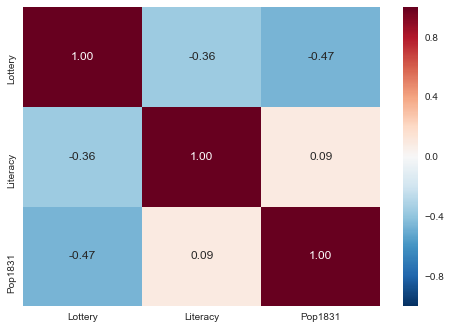

In [23]:
# Load data
dat = sm.datasets.get_rdataset("Guerry", "HistData").data
print(dat[["Lottery","Literacy","Pop1831"]].describe())
sns.heatmap(dat[["Lottery","Literacy","Pop1831"]].corr(), annot=True, fmt=".2f")

# Fit regression model (using the natural log of one of the regressors)
lm = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat)
lm = lm.fit()

# Inspect the results
print(results.summary())

Durbin- Watson test for multicollinearity.

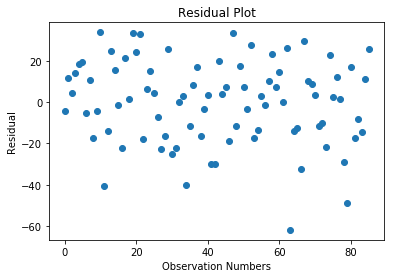

(array([ 0.0012126 ,  0.0012126 ,  0.0024252 ,  0.00606301,  0.01576383,
         0.01333862,  0.02061424,  0.01697643,  0.01333862,  0.01333862]),
 array([-61.94944268, -52.3602245 , -42.77100633, -33.18178816,
        -23.59256998, -14.00335181,  -4.41413363,   5.17508454,
         14.76430271,  24.35352089,  33.94273906]),
 <a list of 10 Patch objects>)

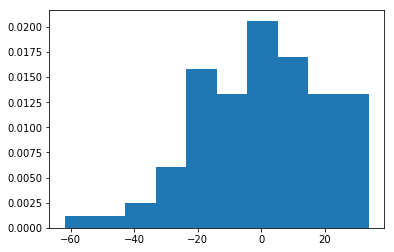

In [14]:
plt.plot(lm.resid,'o')
plt.title('Residual Plot')
plt.ylabel('Residual')
plt.xlabel('Observation Numbers')
plt.show()
plt.hist(lm.resid, normed=True)

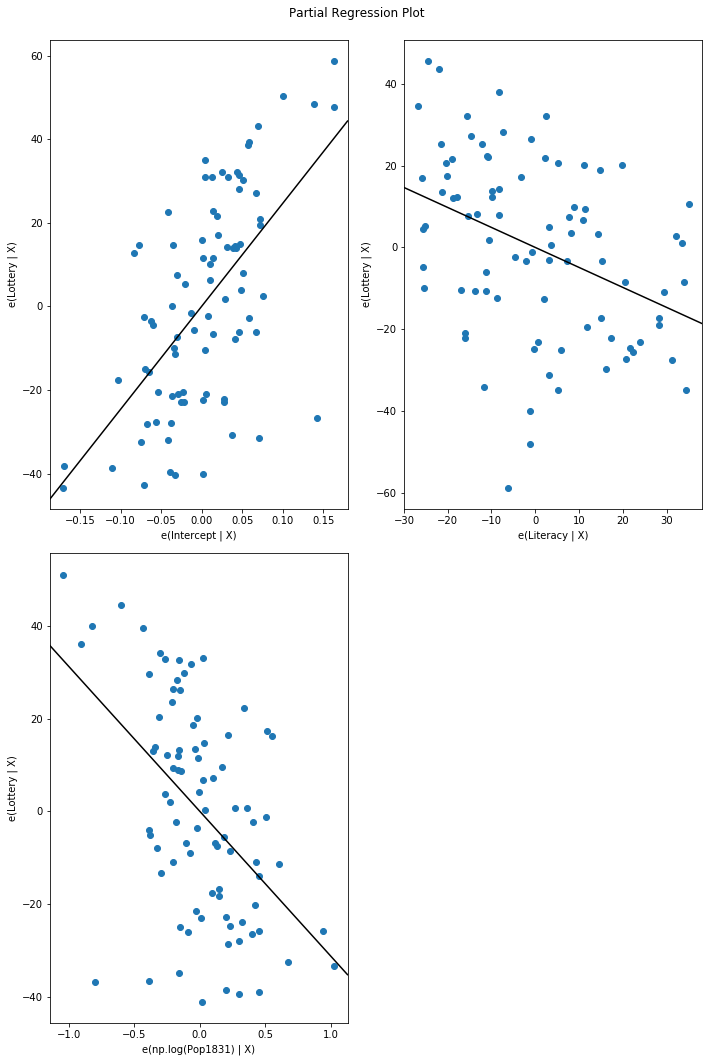

In [15]:
fig = plt.figure(figsize=(10,15))
fig = sm.graphics.plot_partregress_grid(lm, fig=fig)